# MBTI - Myers Briggs Type Indicator

## Libraries

In [173]:
import pandas as pd
import plotly.express as px
from collections import Counter
import string 
import re
import nltk
from nltk.corpus import stopwords

## Data import

In [174]:
df = pd.read_csv('./mbti_data.csv')
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


## Data preprocessing

Let's analyze one raw of the dataset.

In [176]:
df.loc[10,:]

type                                                  INFJ
posts    'One time my parents were fighting over my dad...
Name: 10, dtype: object

In [177]:
#df.loc[10, 'posts']

We can see that each post is separated by "|||".
<br>Let's transform each string by an array of strings.

In [178]:
tmp = df.loc[10, 'posts']
tmp_arr = tmp.split('|||')
#tmp_arr

Better for the future. Let's apply this to all the dataset.

In [179]:
df['posts_v2'] = df['posts'].apply(lambda row : row.split('|||'))

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   type      8675 non-null   object
 1   posts     8675 non-null   object
 2   posts_v2  8675 non-null   object
dtypes: object(3)
memory usage: 203.4+ KB


In [181]:
df.head()

,type,posts,posts_v2
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,"['http://www.youtube.com/watch?v=qsXHcwe3krw, ..."
1,ENTP,'I'm finding the lack of me in these posts ver...,['I'm finding the lack of me in these posts ve...
2,INTP,'Good one _____ https://www.youtube.com/wat...,['Good one _____ https://www.youtube.com/wa...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...","['Dear INTP, I enjoyed our conversation the ..."
4,ENTJ,'You're fired.|||That's another silly misconce...,"['You're fired., That's another silly misconce..."


## Data exploration

Let's see the distribution of the column 'type'.

In [182]:
type_counts = df['type'].value_counts().rename_axis('types').reset_index(name='counts')
#type_counts

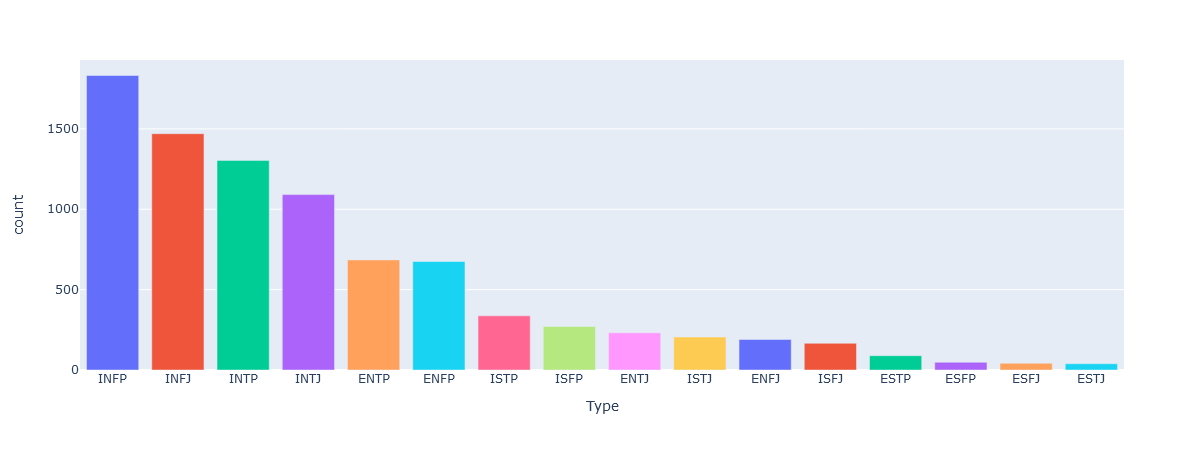

In [183]:
x = type_counts['types']
y = type_counts['counts']

fig = px.bar(x=x, y=y, labels={'x':'Type', 'y':'count'}, color=x)
fig.update_layout(showlegend=False)
fig.show()

Let's see the top words for each type.

In [184]:
stop_words = set(stopwords.words('english'))

def vocab_counter(text):
    text = text.strip()
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text) 
    words = text.split()
    words = [w for w in words if not w in stop_words]
    return Counter(words).most_common(20)

In [185]:
print(vocab_counter(df.loc[10, 'posts']))

[('like', 14), ('people', 11), ('get', 8), ('know', 8), ('infj', 7), ('one', 6), ('life', 6), ('inferior', 6), ('think', 6), ('even', 5), ('physical', 5), ('thing', 5), ('te', 5), ('person', 5), ('ni', 5), ('time', 4), ('manager', 4), ('oh', 4), ('school', 4), ('much', 4)]


In [186]:
# We concat all posts for each MBTI type.
types_all_posts = dict()

for i in range(len(df)):
    key = df.loc[i, 'type']
    value = df.loc[i, 'posts']
    if key in types_all_posts:
        types_all_posts[key].append(value)
    else:
        types_all_posts[key] = [value]
    #print(types_all_posts)

In [187]:
#types_all_posts['ESTJ'][0]

In [188]:
for key in types_all_posts:
    types_all_posts[key] = "".join(types_all_posts[key])

In [189]:
types_all_posts['ESTJ'][0]

't'

In [190]:
types_all_counter = dict()

for key in types_all_posts:
    types_all_counter[key] = vocab_counter(types_all_posts[key])

In [191]:
for key in types_all_counter:
    print(f'{key}: {types_all_counter[key]}\n')

INFJ: [('like', 11921), ('think', 8796), ('people', 8591), ('know', 6822), ('infj', 6472), ('one', 6459), ('really', 6172), ('would', 5820), ('get', 5138), ('time', 4933), ('feel', 4885), ('much', 4273), ('com', 4244), ('well', 3982), ('love', 3974), ('things', 3677), ('good', 3666), ('say', 3591), ('way', 3574), ('see', 3511)]

ENTP: [('like', 5354), ('think', 3919), ('people', 3700), ('one', 3026), ('entp', 2995), ('know', 2782), ('would', 2685), ('really', 2590), ('get', 2492), ('time', 1979), ('well', 1890), ('much', 1668), ('good', 1652), ('see', 1632), ('way', 1585), ('say', 1579), ('com', 1501), ('things', 1489), ('type', 1436), ('something', 1417)]

INTP: [('like', 9732), ('think', 7098), ('people', 7096), ('would', 5648), ('one', 5471), ('know', 5043), ('intp', 4963), ('really', 4622), ('get', 4377), ('com', 4170), ('time', 3987), ('well', 3299), ('much', 3247), ('watch', 3104), ('say', 2998), ('something', 2976), ('www', 2944), ('things', 2892), ('good', 2862), ('http', 2854)